# OOP (2025 Fall) 실습01: `Map`과 `List` 활용 연습
- 이름: 박용성
- 학번: 20200597

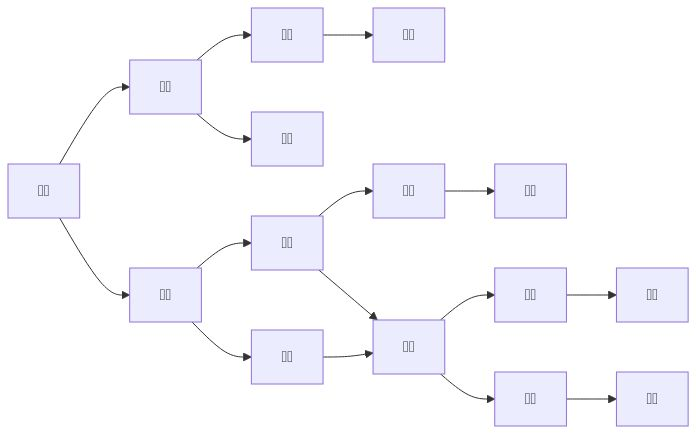

e55d1848-d425-43ec-87d2-d496cd6fc394

In [1]:
import javax.imageio.*;

var mmgraph = """
graph LR;
    서울 --> 원주 --> 평창 --> 강릉
    원주 --> 안동
    서울 --> 천안 --> 대전 & 공주
    대전 --> 대구 --> 부산
    공주 --> 익산 --> 광주 --> 목포
    대전 --> 익산 --> 전주 --> 여수
""";

display(ImageIO.read(new URL("https://mermaid.ink/img/"+Base64.getEncoder().encodeToString(mmgraph.getBytes()))));

위의 하행선 철도 노선도를 자바의 Map과 List를 활용한 인접리스트(adjacencty list) 데이터 구조로 옮겨 `routeMap` 변수에 저장해 보라.

자바에서 인접리스트를 표현하기 위한 타입은 `Map< String, List<String> >`이라는 것을 먼저 이해하고 작성해 보라.

In [2]:
// 여기에 Map과 List를 활용한 그래프의 인접리스트 표현 작성
Map< String, List<String> > routeMap = new HashMap<>(); // null 대신 적절한 내용 작성

In [3]:
routeMap.put("서울", List.of("원주", "천안"));

routeMap.put("원주", List.of("안동", "평창"));
routeMap.put("천안", List.of("대전", "공주"));

routeMap.put("평창", List.of("강릉"));
routeMap.put("안동", List.of());
routeMap.put("대전", List.of("대구", "익산"));
routeMap.put("공주", List.of("익산"));

routeMap.put("강릉", List.of());
routeMap.put("대구", List.of("부산"));
routeMap.put("익산", List.of("광주", "전주"));

routeMap.put("부산", List.of());
routeMap.put("광주", List.of("목포"));
routeMap.put("전주", List.of("여수"));

routeMap.put("목포", List.of());
routeMap.put("여수", List.of());


출발지(`orig`)로부터 도착지(`dest`)까지 하행선 노선이 연결되어 있는지 판별하는 `hasPath` 함수를 재귀적으로 작성해 보라.
위의 `routeMap`을 그냥 전역변수처럼 활용하라.

In [4]:
boolean hasPath(String orig, String dest) {
    /*
    귀납기초) 출발지 orig와 도착지 dest가 정보가 같다면 출발하자마자 도착한 것이므로 true
    귀납단계) orig로부터 인접한 지점을 출발지로 삼아 dest까지 노선이 연결된 경우가 있다면 true이고
            그렇지 않으면 (즉, 어떤 인접한 지점을 출발지로 삼아도 dest까지 노선이 연결된 경우가 없다면) false
    */
    if (orig.equals(dest)) return true;

    var routeList = routeMap.get(orig);
    // System.out.println("("+orig+","+dest+") :" + routeList);
    
    if (routeList == null || routeList.isEmpty()) return false;
    
    for (String route : routeList) {
        if (hasPath(route, dest)) return true;
    }
    return false;
}

In [5]:
// 몇몇 도시들로 hasPath 함수를 테스트해 보라. 몇 개는 true가 나오고 몇 개는 false가 나오는 경우로.

In [6]:
hasPath("서울","대전");

true

In [7]:
hasPath("원주","대전");

false

In [8]:
hasPath("서울","부산");

true

In [9]:
hasPath("천안","익산");

true